# Checking the cons of train test split

In [1]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics



In [2]:
iris = load_iris()

In [3]:
X = iris.data
y = iris.target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 2)

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [12]:
print metrics.accuracy_score(y_test,y_pred)

1.0


#  Using K fold cross validation

In [13]:
from sklearn.cross_validation import cross_val_score


In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
# using knn with k = 5 for a 10 fold cross validation
scores = cross_val_score(knn, X,y,cv=10,scoring='accuracy')
print scores

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [15]:
print scores.mean()

0.966666666667


In [16]:
# checking for an optimal k value for cross validation

k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
print k_scores

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

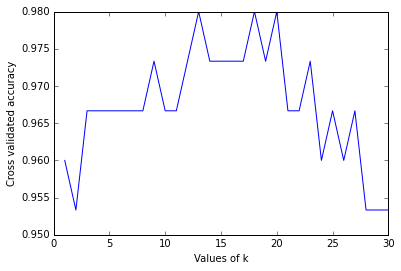

In [18]:
plt.plot(k_range,k_scores)
plt.xlabel('Values of k')
plt.ylabel('Cross validated accuracy')

# Cross validation for choosing between models

In [19]:
knn = KNeighborsClassifier(n_neighbors=20)
print cross_val_score(knn,X,y,cv=10,scoring='accuracy').mean()

0.98


In [20]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
print cross_val_score(log_reg,X,y,cv=10,scoring='accuracy').mean()

0.953333333333


# Cross Validation for choosing between features

In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [22]:
data = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv" , index_col=0)

In [23]:
X = data[['TV','Radio','Newspaper']]
y = data['Sales']

In [25]:
lin_reg = LinearRegression()

In [26]:
scores = cross_val_score(lin_reg,X,y,cv=10,scoring='mean_squared_error')
print scores

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [27]:
mse_scores = -scores
print mse_scores

[ 3.56038438  3.29767522  2.08943356  2.82474283  1.3027754   1.74163618
  8.17338214  2.11409746  3.04273109  2.45281793]


In [28]:
rmse_scores = np.sqrt(mse_scores)
print rmse_scores

[ 1.88689808  1.81595022  1.44548731  1.68069713  1.14139187  1.31971064
  2.85891276  1.45399362  1.7443426   1.56614748]


In [29]:
print rmse_scores.mean()

1.69135317081


# Now excluding Newspaper

In [30]:
X = data[['TV','Radio']]
scores = cross_val_score(lin_reg,X,y,cv=10,scoring='mean_squared_error')
print np.sqrt(-scores).mean()

1.67967484191
